#  Buyer's Intent

Data: https://www.kaggle.com/roshansharma/online-shoppers-intention

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as py
import plotly.graph_objs as go

# for data analysis
#import pandas_profiling as profile
from sklearn.utils import shuffle

## Importing the Data

In [20]:
data=pd.read_csv("online_shoppers_intention.csv")
shapeBefore=data.shape
print("Shape: ",shapeBefore)
data.head(3)

Shape:  (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


## Data Exploration and PreProcessing

#### Description of Variables

In [21]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Finding Nulls

In [22]:
null_table = pd.DataFrame(data.isnull().sum().values.reshape(1,-1), columns = data.isnull().sum().index)
null_table = null_table.rename(index = {0:'Total Null Values'})
null_pct = null_table.iloc[0,:]/12330 *100
null_pct = pd.DataFrame(null_pct.values.reshape(1,-1), columns = null_pct.index)
null_pct = null_pct.rename(index = {0 : 'Null %'})
null_table = null_table.append(null_pct)
null_table

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Total Null Values,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.113544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Dropping Nulls

In [23]:
data = data.dropna()
shapeAfter=data.shape
print("Shape Before: {}\nShape After: {}".format(shapeBefore, shapeAfter))

Shape Before: (12330, 18)
Shape After: (12316, 18)


#### View of the null counts again

In [24]:
null_table = pd.DataFrame(data.isnull().sum().values.reshape(1,-1), columns = data.isnull().sum().index)
null_table = null_table.rename(index = {0:'Total Null Values'})
null_pct = null_table.iloc[0,:]/12330 *100
null_pct = pd.DataFrame(null_pct.values.reshape(1,-1), columns = null_pct.index)
null_pct = null_pct.rename(index = {0 : 'Null %'})
null_table = null_table.append(null_pct)
null_table

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Total Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Note: </b>Some Values have a -1 in the Duration variables, which is not described in the data description:

#### Droping bad data values

In [25]:
neg_ad_dur = data[data['Administrative_Duration'] < 0]
neg_info_dur = data[data['Informational_Duration'] < 0]
neg_prd_dur = data[data['ProductRelated_Duration'] < 0]
print(" The length of each durations are {} ,{} , {}".format(len(neg_ad_dur), len(neg_info_dur),len(neg_prd_dur)))

 The length of each durations are 33 ,33 , 33


In [26]:
# Dropping the negative Durations
data = data.drop(data[data['Administrative_Duration'] < 0].index)
data = data.drop(data[data['Informational_Duration'] < 0].index)
data = data.drop(data[data['ProductRelated_Duration'] < 0].index)
#Checking , no negative values
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,81.126229,0.505333,34.601780,31.846536,1199.253065,0.021723,0.042611,5.911793,0.061532,2.124318,2.356997,3.147114,4.071969
std,3.325128,177.046838,1.272138,141.002498,44.521443,1915.935446,0.047686,0.047964,18.600350,0.199122,0.911718,1.717264,2.401981,4.025428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,187.100000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003077,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.950000,0.000000,0.000000,38.000000,1470.909852,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Transforming categorical variables into dummy variables

In [27]:
data=pd.get_dummies(data, columns=['Month', 'OperatingSystems',
                                  'Browser','Region','TrafficType', 
                                  'VisitorType',])


#### New Columns

In [28]:
for i in data.columns:
    print(i)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
Weekend
Revenue
Month_Aug
Month_Dec
Month_Feb
Month_Jul
Month_June
Month_Mar
Month_May
Month_Nov
Month_Oct
Month_Sep
OperatingSystems_1
OperatingSystems_2
OperatingSystems_3
OperatingSystems_4
OperatingSystems_5
OperatingSystems_6
OperatingSystems_7
OperatingSystems_8
Browser_1
Browser_2
Browser_3
Browser_4
Browser_5
Browser_6
Browser_7
Browser_8
Browser_9
Browser_10
Browser_11
Browser_12
Browser_13
Region_1
Region_2
Region_3
Region_4
Region_5
Region_6
Region_7
Region_8
Region_9
TrafficType_1
TrafficType_2
TrafficType_3
TrafficType_4
TrafficType_5
TrafficType_6
TrafficType_7
TrafficType_8
TrafficType_9
TrafficType_10
TrafficType_11
TrafficType_12
TrafficType_13
TrafficType_14
TrafficType_15
TrafficType_16
TrafficType_17
TrafficType_18
TrafficType_19
TrafficType_20
VisitorType_New_Visitor
VisitorType_Other
VisitorType_Returning_Vi

#### Encoding Binary Variables

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

data.loc[:,"Weekend":"Revenue"]

,Weekend,Revenue
0,0,0
1,0,0
3,0,0
4,1,0
5,0,0
...,...,...
12325,1,0
12326,1,0
12327,1,0
12328,0,0


#### Scaling the Data:

After scaling some metrics, lets have another look at the data description:

In [30]:
from sklearn.preprocessing import StandardScaler
data[['Administrative_Duration', 
      'Informational_Duration', 
      'ProductRelated_Duration', 
      'PageValues']] = StandardScaler().fit_transform(data[['Administrative_Duration', 
                                                            'Informational_Duration', 
                                                            'ProductRelated_Duration', 
                                                            'PageValues']])

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12283.000000,1.228300e+04,12283.000000,1.228300e+04,12283.000000,1.228300e+04,12283.000000,12283.000000,1.228300e+04,12283.000000,...,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.323862,1.297170e-15,0.505333,4.122382e-15,31.846536,5.644033e-16,0.021723,0.042611,-3.147419e-15,0.061532,...,0.001058,0.003012,0.000244,0.000081,0.000814,0.001384,0.016038,0.137914,0.006920,0.855166
std,3.325128,1.000041e+00,1.272138,1.000041e+00,44.521443,1.000041e+00,0.047686,0.047964,1.000041e+00,0.199122,...,0.032517,0.054804,0.015627,0.009023,0.028523,0.037178,0.125628,0.344824,0.082902,0.351948
min,0.000000,-4.582377e-01,0.000000,-2.454083e-01,0.000000,-6.259615e-01,0.000000,0.000000,-3.178453e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.582377e-01,0.000000,-2.454083e-01,7.000000,-5.283029e-01,0.000000,0.014286,-3.178453e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,-4.130501e-01,0.000000,-2.454083e-01,18.000000,-3.114809e-01,0.003077,0.025000,-3.178453e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,7.243447e-02,0.000000,-2.454083e-01,38.000000,1.417938e-01,0.016667,0.050000,-3.178453e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,1.873944e+01,24.000000,1.783568e+01,705.000000,3.276563e+01,0.200000,0.200000,1.913224e+01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Oversampling 

#### Class Sizes

Looks like we have an imbalance of sessions with revenue/no revenue

In [31]:
posRev=0
negRev=0
otherRev=0

for i in data["Revenue"]:
    if  i == 1:
        posRev +=1
    elif i == 0:
        negRev +=1
    else:
        otherRev +=1
        
print("Percent of Positives: ", (posRev/(negRev+posRev)))
print("otherRev:", otherRev)


Percent of Positives:  0.15533664414231052
otherRev: 0


We need to bootstrap/oversample this data to deal with an imbalance of sessions where revenue occured. We will first create two data sets to split each class:

In [32]:
dataPos= data[data.Revenue > 0]
dataNeg= data[data.Revenue == 0]      

Next we will stack the data sets, taking only a matching amount from dataNeg

In [33]:
print("Length of revPos:",len(dataPos))
print("Length of revNeg:",len(dataNeg))

print("...........reducing negative revenue sessions.........................")

# shuffle a sample the negative set
dataNeg = shuffle(dataNeg)
dataNegShort=dataNeg[:1908]

print("Length of revPos:",len(dataPos))
print("Length of revNegShort:",len(dataNegShort))

dataNew=dataPos.append(dataNegShort)
print("Length of newData:",len(dataNew))


Length of revPos: 1908
Length of revNeg: 10375
...........reducing negative revenue sessions.........................
Length of revPos: 1908
Length of revNegShort: 1908
Length of newData: 3816


Finally, lets shuffle the data again:

In [34]:
from sklearn.utils import shuffle
data = shuffle(dataNew).copy()
data.reset_index(drop=True, inplace=True)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,-0.458238,0.0,-0.245408,15.0,-0.396995,0.023077,0.039487,-0.317845,0.0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,2.921655,0.0,-0.245408,126.0,1.694829,0.001538,0.015568,-0.138603,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-0.458238,0.0,-0.245408,6.0,-0.554453,0.066667,0.100000,-0.317845,0.0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,1.698342,0.0,-0.245408,1.0,-0.609676,0.000000,0.040000,-0.317845,0.0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,-0.212530,0.0,-0.245408,25.0,-0.074990,0.007407,0.022840,-0.317845,0.0,...,0,0,0,0,0,0,0,0,0,1


## Exploratory Analysis

To see what variables could be used, we ran a logistic regression summary in SAS. We found the following variables to be statistically sinificant at the .05 level of confidence:
1. Administrative
2. ProductRelated_Duration
3. ExitRates
4. PageValues
5. Month_Dec
6. Month_Feb
7. Month_Mar
8. Month_May
9. Region_1
10. Region_2
11. Region_3
12. Region_7
13. TrafficType_13
14. BounceRates

We will use these variable to move forward. The SAS output will be provided with our analysis in a seperate file. 

In [17]:
#### Export Data
data.to_csv("data.csv")

#### Second Data Set (omitting non-significant variables)

In [81]:
dataReduced=data[["Administrative", "ProductRelated_Duration",
                       "ExitRates", "PageValues",
                       "Month_Dec", "Month_Feb", "Month_Mar",
                       "Month_May", "Region_1", "Region_2",
                        "Region_3", "Region_7", "TrafficType_13", "Revenue",'BounceRates' ]]
dataReduced.columns
X1=dataReduced.drop(["Revenue"], axis=1)
y1=dataReduced.Revenue
print("X1 Shape", X1.shape )
print("X2 Shape", X2.shape )

X1 Shape (3816, 14)
X2 Shape (3816, 13)


In [94]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
3811    1
3812    1
3813    1
3814    0
3815    0
Name: Revenue, Length: 3816, dtype: int64

#### Some Visualizations to find correlation

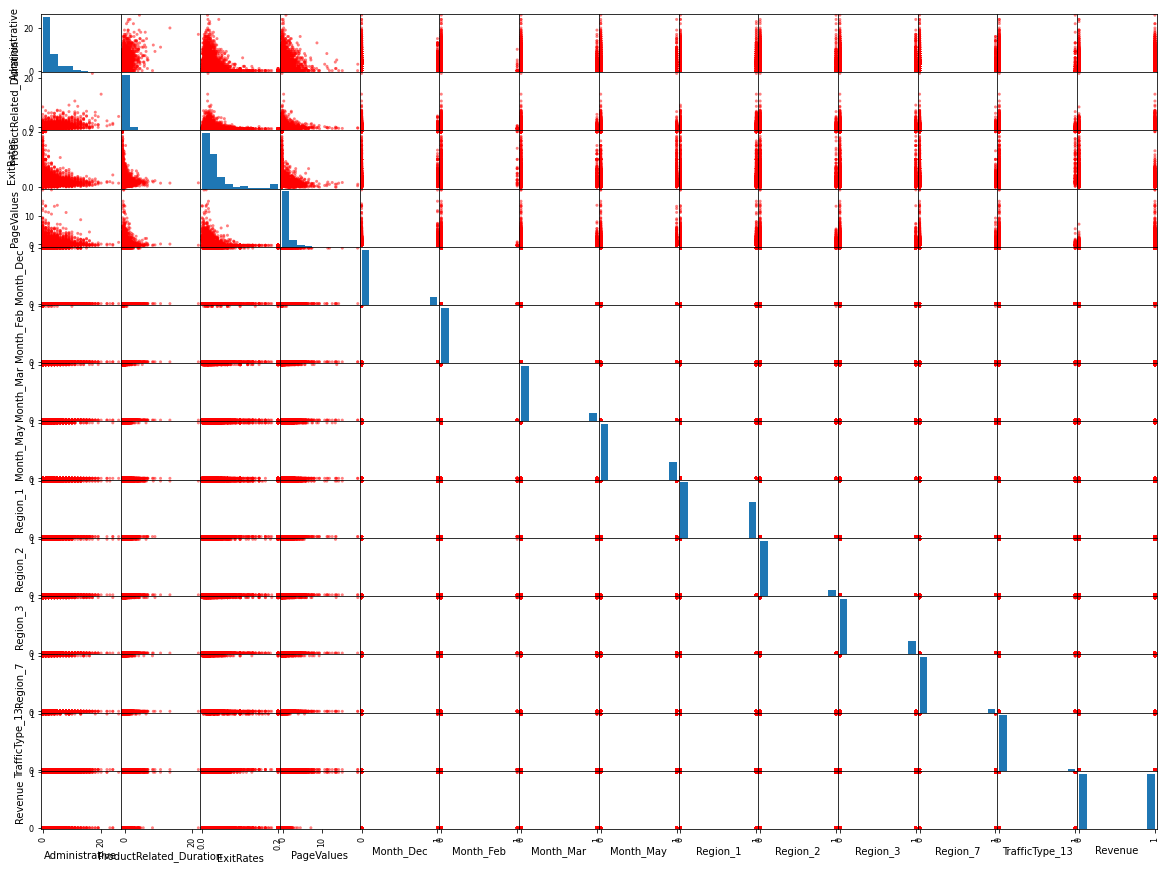

In [39]:
from pandas.plotting import scatter_matrix
from matplotlib.artist import setp

%matplotlib inline
axs=scatter_matrix(dataReduced, figsize=(20,15), color='red')

plt.show()

### Simple Logistic Regression

<table style='width:500px'>
<tr style="background-color:white;height:50px">
    <td><b>Confusion Matrix</b></td>
    <td style='width:100px'></td>
    <td colspan=2 style='border: solid black 1px;text-align:center;font-size:12pt;font-family:times'><b>Predicted Value</b></td>
</tr>
<tr style="background-color:white;height:50px">
    <td ></td>
    <td ></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Negative (0)</u></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Positive (1)</u></td>
</tr>
<tr style="background-color:white;height:100px">
    <td rowspan=2 style='border: solid black 1px;-webkit-transform: rotate(-90deg); -moz-transform: rotate(-90deg); font-size:12pt;font-family:times'><b>Actual Value</b></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Negative (0)</u></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:green'>True Negative</td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:red'>False Positive <br><br> <i>Type II Error</i></td>
</tr>
<tr style="background-color:white;height:100px">
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center'><u>Positive (1)</u></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:red'>False Negative <i><br><br> Type I Error</i></td>
    <td style='border: solid black 1px;font-size:11pt;font-family:times; text-align:center;color:green'>True Positive</td>
</tr>
</table>
<br><br><br>
<div style='text-align:center; font-size:12pt'>$ Precision = \frac{\sum{\text{True Positive}}}{\sum{\text{True Positive}}+\sum{\text{False Positive}}} $</div>
<br>
<br>
<div style='text-align:center; font-size:12pt'>$ Recall = \frac{\sum{\text{True Positive}}}{\sum{\text{True Positive}}+\sum{\text{False Negative}}} $</div>
<br>
<br>
<div style='text-align:center; font-size:12pt'>$ F1 = \frac{2 \times Precision \times Recall}{Precision + Recall} $</div>
<br>
<br>
<p>You can use <b style='color:blue;'>classification_report( )</b> and <b style='color:blue;'>confusion_matrix( )</b> functions to capture the above discussed metrics.</p>

#### Splitting the data into train/test splits

In [40]:
from sklearn.model_selection import train_test_split

xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1, y1, test_size=.25, stratify=y1, random_state=0)

print("Test Sizes: ",(len(xtest1))/(len(xtrain1)))

Test Sizes:  0.3333333333333333


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Lets Instantiate the model
LogModel1 = LogisticRegression(max_iter=2000)

#fit the model
LogModel1.fit(xtrain1, ytrain1)

# Step 4
y_test_hat1 = LogModel1.predict(xtest1)

In [42]:
from sklearn.metrics import accuracy_score
print("Model Accuracy:",accuracy_score(ytest1,y_test_hat1, normalize = True) * 100 )


Model Accuracy: 81.44654088050315


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print("Model Classification report\n",classification_report(ytest1,y_test_hat1))

Model Classification report
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       477
           1       0.88      0.73      0.80       477

    accuracy                           0.81       954
   macro avg       0.82      0.81      0.81       954
weighted avg       0.82      0.81      0.81       954



In [44]:
from sklearn.model_selection import cross_validate
scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(LogModel1,  
                        xtest1, y_test_hat1, 
                        scoring=scoring, cv=5, 
                        return_train_score=False)
print("Model Results:")
for i in scores:
    print(i, scores[i])

Model Results:
fit_time [0.01498771 0.0124979  0.01533794 0.01110506 0.01303792]
score_time [0.00573635 0.00433683 0.00441813 0.0037508  0.00339508]
test_acc [0.97382199 0.97382199 0.96858639 0.96858639 0.98421053]
test_prec [0.97435897 1.         0.96202532 0.98684211 0.98717949]
test_rec [0.96202532 0.93670886 0.96202532 0.9375     0.97468354]
test_f1 [0.96815287 0.96732026 0.96202532 0.96153846 0.98089172]


#### Lets see the coefficients

In [45]:
model_1_features=list(dataReduced.columns)
coef_dict1 = {}
for coef, feat in zip(LogModel1.coef_[0,:],model_1_features):
    coef_dict1[feat] = coef

In [46]:
print("Variable Coefficients")
coef_dict1

Variable Coefficients


{'Administrative': 0.01954358825841411,
 'ProductRelated_Duration': 0.38620355446790017,
 'ExitRates': -3.6219142101437174,
 'PageValues': 2.435464344014918,
 'Month_Dec': -0.8876549273631938,
 'Month_Feb': -1.4558557048545686,
 'Month_Mar': -1.0965924042032411,
 'Month_May': -1.3073411787546754,
 'Region_1': 0.1663853682987458,
 'Region_2': 0.13412609843006718,
 'Region_3': 0.12027073447551834,
 'Region_7': 0.2507990725985471,
 'TrafficType_13': -0.587049812036684}

### K-Nearest Neighbors clustering

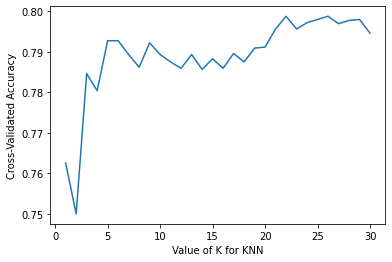

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kNN, X1, y1, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [96]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.3, stratify=y1, random_state = 0)

In [97]:
#as we can see in the graph, the best possible value for k os 3 

Knn3 = KNeighborsClassifier(n_neighbors = 5)
# train the model
Knn3.fit(X_train1, y_train1)
# get the predict value from X_test
y_pred1 = Knn3.predict(X_test1)
# print the score
print('accuracy: ', Knn3.score(X_test1, y_test1))


accuracy:  0.7790393013100436


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

#print("Full Data Classification report\n",classification_report(y_test1,y_pred1))
print("Reduced Data Classification report\n",classification_report(y_test1,y_pred1))

Reduced Data Classification report
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       573
           1       0.79      0.76      0.77       572

    accuracy                           0.78      1145
   macro avg       0.78      0.78      0.78      1145
weighted avg       0.78      0.78      0.78      1145



In [99]:
from sklearn.model_selection import cross_validate
scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(Knn3,  
                        X_test1, y_pred1, 
                        scoring=scoring, cv=5, 
                        return_train_score=False)

scores

{'fit_time': array([0.00422883, 0.00284171, 0.00416493, 0.00275397, 0.00265002]),
 'score_time': array([0.01357102, 0.01133108, 0.01398492, 0.011868  , 0.01096201]),
 'test_acc': array([0.84279476, 0.84279476, 0.85152838, 0.89956332, 0.85152838]),
 'test_prec': array([0.89247312, 0.85576923, 0.88      , 0.90654206, 0.87254902]),
 'test_rec': array([0.76146789, 0.80909091, 0.8       , 0.88181818, 0.80909091]),
 'test_f1': array([0.82178218, 0.8317757 , 0.83809524, 0.89400922, 0.83962264])}

## Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

Training Accuracy : 0.8569824035941594
Testing Accuracy : 0.8410480349344979
[[491  82]
 [100 472]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       573
           1       0.85      0.83      0.84       572

    accuracy                           0.84      1145
   macro avg       0.84      0.84      0.84      1145
weighted avg       0.84      0.84      0.84      1145



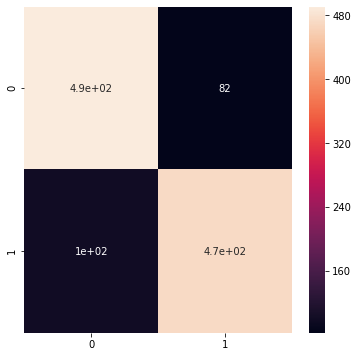

In [115]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.3, stratify = y1, random_state = 42)

RF = RandomForestClassifier(max_depth =5)
RF.fit(X_train2, y_train2)

y_pred2 = RF.predict(X_test2)

# evaluating the model
print("Training Accuracy :", RF.score(X_train2, y_train2))
print("Testing Accuracy :", RF.score(X_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(y_test2, y_pred2)
print(cr)

In [105]:
from sklearn.model_selection import cross_validate
scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(RF,  
                        X_test2, y_pred2, 
                        scoring=scoring, cv=5, 
                        return_train_score=False)

scores

{'fit_time': array([0.16316128, 0.14007306, 0.13607907, 0.13601208, 0.13694811]),
 'score_time': array([0.01157594, 0.01126218, 0.01109791, 0.01110101, 0.01157713]),
 'test_acc': array([0.97379913, 0.99563319, 0.97816594, 0.99126638, 0.99126638]),
 'test_prec': array([0.99056604, 0.99099099, 1.        , 1.        , 1.        ]),
 'test_rec': array([0.95454545, 1.        , 0.95454545, 0.98181818, 0.98198198]),
 'test_f1': array([0.97222222, 0.99547511, 0.97674419, 0.99082569, 0.99090909])}

In [108]:
imp_features = dict(zip(X1.columns, RF.feature_importances_))

In [109]:
imp_features

{'Administrative': 0.040214826887353415,
 'ProductRelated_Duration': 0.10666376052115359,
 'ExitRates': 0.11899976160065792,
 'PageValues': 0.599965441229835,
 'Month_Dec': 0.006733553572129721,
 'Month_Feb': 0.0014742955311136444,
 'Month_Mar': 0.01685572683063022,
 'Month_May': 0.026470493643950863,
 'Region_1': 0.0030021131323467202,
 'Region_2': 0.002165972806469872,
 'Region_3': 0.00259553101204293,
 'Region_7': 0.0026463119898366655,
 'TrafficType_13': 0.004803111315991022,
 'BounceRates': 0.06740909992648841}

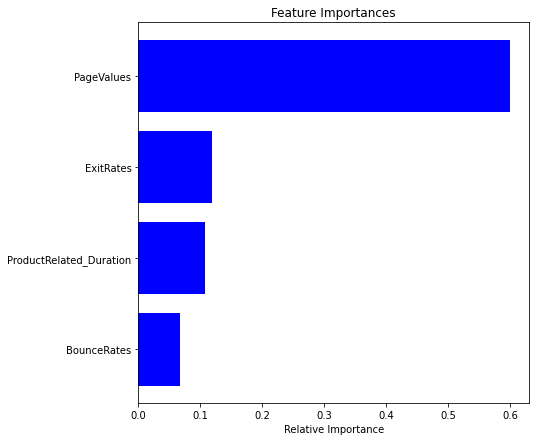

In [114]:
features = X1.columns
importances = RF.feature_importances_
indices = np.argsort(importances)[-4:]
plt.figure(figsize=(7,7))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()